In [ ]:
# !pip install japanize-matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from mpl_scales import set_xticks, set_yticks

In [2]:
df = sns.load_dataset("taxis")

In [3]:
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


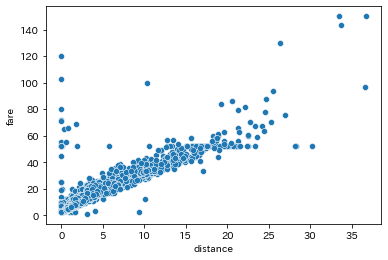

In [4]:
# original plot
sns.scatterplot(data=df, x="distance", y="fare");

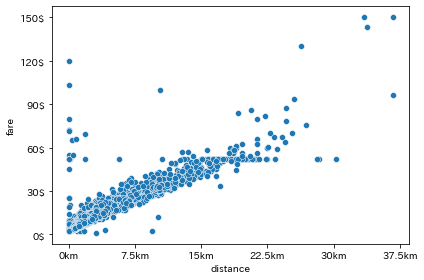

In [5]:
# example1. basic usage
ax = sns.scatterplot(data=df, x="distance", y="fare")
fig = set_xticks(ax, diff=7.5, format=lambda x, _: f"{x:.0f}km" if x%1==0 else f"{x:.1f}km")
fig = set_yticks(ax, n=5, format="{:d}$")
fig

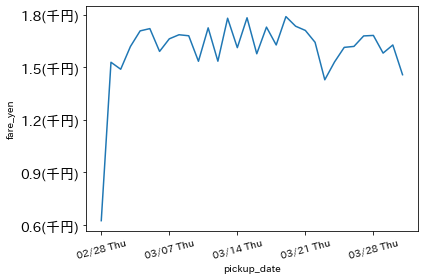

In [6]:
# example2. date formatting and ticklabel styling
df["fare_yen"] = df["fare"] * 125
df["pickup"] = pd.to_datetime(df["pickup"])
df["pickup_date"] = df["pickup"].dt.date

ax = sns.lineplot(data=df, x="pickup_date", y="fare_yen", ci=None)
fig = set_xticks(ax, diff=7, format="%m/%d %a", rot=15)
fig = set_yticks(ax, n=5, format=lambda x, _: "{:,.1f}(千円)".format(x/1000), labelsize=14)

fig

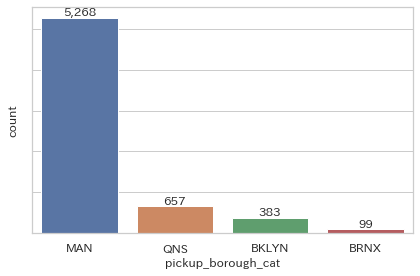

In [7]:
# example3. other usage
sns.set_theme(style="whitegrid", font="IPAexGothic")

df["pickup_borough_cat"] = pd.Categorical(df["pickup_borough"], categories=["Manhattan", "Queens", "Brooklyn", "Bronx"], ordered=True)
ax = sns.countplot(data=df, x="pickup_borough_cat", alpha=1)

labels = [f"{v:,d}" for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)

set_xticks(ax, labels=["MAN", "QNS", "BKLYN", "BRNX"])
set_yticks(ax, label_off=True)

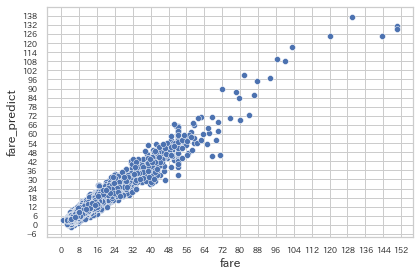

In [8]:
# Example4. same setting for both axis
import numpy.random as random
from mpl_scales import set_bothticks
df["fare_predict"] = df["fare"] + random.randn(len(df)) * (df["fare"] + 10) * 0.1

ax = sns.scatterplot(data=df, x="fare", y="fare_predict")
set_bothticks(ax, n=20, labelsize=8)